## Clustering Geo Data(lon, Lat)

There are many algorithms that can handle arbitary distance functions, in particular, geodetic distance functions. Hierarichal clustering, PAM, CLARA, DBSCAN and HDBSCAN.

Simpl Approaches:
*   K-Mean Clistering
*   Haversine

Moroever, GPS coordinates can be directly converted to geohash which divides the Earth into buckets of different sizes and is an adjustable precision clustering method.



In [1]:
import pandas as pd
import numpy as np
import string
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [4]:
!ls

drive  sample_data


In [5]:
# Getting germany longitude and latitude data
# following data is downloaded from https://simplemaps.com/data/de-cities

geo_data = pd.read_csv('drive/MyDrive/de_coordinates.csv', encoding='utf-8')
geo_data = geo_data.rename(columns={'plz':'zipcode', 'note':'city'})
geo_data.shape
geo_data.head()

(8170, 7)

,Unnamed: 0,zipcode,city,einwohner,qkm,lon,lat
0,0,81248,81248 München,121,1.984763,11.403147,48.148273
1,1,60315,60315 Frankfurt am Main (FOUR),0,0.017481,8.673922,50.112310
2,2,24988,24988 Oeversee,3350,36.491463,9.429714,54.707718
3,3,93185,93185 Michelsneukirchen,1786,32.873844,12.541324,49.121808
4,4,93489,93489 Schorndorf,2622,38.597260,12.596062,49.167521


In [6]:
# generating random customers #
customers = []
i = 0
while i <= 65000:
  rid = ''.join(random.choices(string.ascii_uppercase +
                               string.digits, k=7))
  if not rid in customers:
    customers.append(rid)
    i += 1
print(len(customers))
customers[:10]

65001


['8NHSE37',
 'MZMOS3Y',
 'UA06GE8',
 'DN1OU6V',
 'N569HXF',
 'CKL15HG',
 '90G5F67',
 'XC35NQE',
 'DLV31ZR',
 '9HIL34P']

In [7]:
# generating random emp_ids
emps = []
i = 0
while i < 250:
  eid = ''.join(random.choices(string.ascii_uppercase +
                               string.digits, k=7))
  if not eid in emps:
    emps.append(eid)
    i += 1
print(len(emps))
emps[:10]

250


['WFK1KQP',
 'V2NVJ6H',
 'TX2RF13',
 'QOF3CDP',
 '0GXOMME',
 'P9S6929',
 'LSP87JS',
 'A3Y9EIB',
 'DFKKNM5',
 '9VB1X37']

In [8]:
a = np.random.lognormal(size=8170)
a /= a.sum()

a.sum()

1.0

In [9]:
df = pd.DataFrame()
df['customer_id'] = customers
df["city"] = np.random.choice(geo_data['city'], size=len(df), p=a)
df['emp_id'] = np.random.choice(emps, size=len(df))
df = df.merge(geo_data, on='city')
df = df.drop_duplicates('customer_id')
df.head()
df.shape

,customer_id,city,emp_id,Unnamed: 0,zipcode,einwohner,qkm,lon,lat
0,8NHSE37,23629 Sarkwitz,5NNPKB4,2459,23629,352,6.155528,10.666329,53.991418
1,AJ3K3R8,23629 Sarkwitz,AKNX429,2459,23629,352,6.155528,10.666329,53.991418
2,Y4HYUFB,23629 Sarkwitz,49TOI63,2459,23629,352,6.155528,10.666329,53.991418
3,9GAF459,23629 Sarkwitz,RD7GWAH,2459,23629,352,6.155528,10.666329,53.991418
4,7EEXRFL,23629 Sarkwitz,SLICXJ1,2459,23629,352,6.155528,10.666329,53.991418


(65001, 9)

In [10]:
df.emp_id.value_counts()

7QWXT83    333
NS054PI    309
ST6X8JP    302
W1943QM    296
8MNB6ML    294
          ... 
UNJ59P3    229
A3Y9EIB    229
AC98XRK    227
1K1W9RL    225
GPDWZVU    221
Name: emp_id, Length: 250, dtype: int64

In [11]:
# Converting the lat long to radians
df[['lon_r', 'lat_r']] = df.apply(
    lambda x: [
        math.radians(x['lon']),
        math.radians(x['lat'])
    ], axis=1, result_type='expand'
)

In [12]:
df.tail()
df.head()

,customer_id,city,emp_id,Unnamed: 0,zipcode,einwohner,qkm,lon,lat,lon_r,lat_r
64996,O2BSVZ3,94261 Kirchdorf i. Wald,W1943QM,269,94261,2143,30.623672,13.259557,48.912702,0.231423,0.853688
64997,GFMO2W9,13405 Berlin Wedding,KP8Q2ZN,3761,13405,4826,7.941988,13.297874,52.558901,0.232092,0.917326
64998,KYFKT41,77767 Appenweier,5OLN43J,1251,77767,9742,38.290764,7.979592,48.553156,0.139270,0.847412
64999,EY6ZTDW,31604 Raddestorf,BWO6VZS,6154,31604,2000,41.823144,8.947960,52.450665,0.156171,0.915437
65000,MOJM0DO,32584 Löhne,X4I1JHY,868,32584,39812,59.466634,8.722445,52.199184,0.152235,0.911048


,customer_id,city,emp_id,Unnamed: 0,zipcode,einwohner,qkm,lon,lat,lon_r,lat_r
0,8NHSE37,23629 Sarkwitz,5NNPKB4,2459,23629,352,6.155528,10.666329,53.991418,0.186163,0.942328
1,AJ3K3R8,23629 Sarkwitz,AKNX429,2459,23629,352,6.155528,10.666329,53.991418,0.186163,0.942328
2,Y4HYUFB,23629 Sarkwitz,49TOI63,2459,23629,352,6.155528,10.666329,53.991418,0.186163,0.942328
3,9GAF459,23629 Sarkwitz,RD7GWAH,2459,23629,352,6.155528,10.666329,53.991418,0.186163,0.942328
4,7EEXRFL,23629 Sarkwitz,SLICXJ1,2459,23629,352,6.155528,10.666329,53.991418,0.186163,0.942328


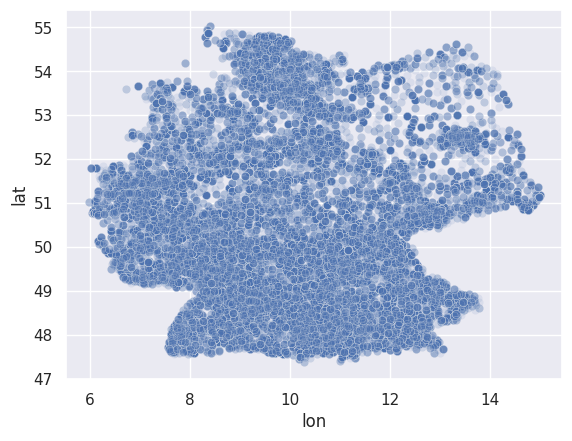

In [13]:
%matplotlib inline
sns.set(color_codes=True)
lon_lat_plot = sns.scatterplot(x='lon',
                               y='lat',
                               alpha=0.10,
                               data=df)

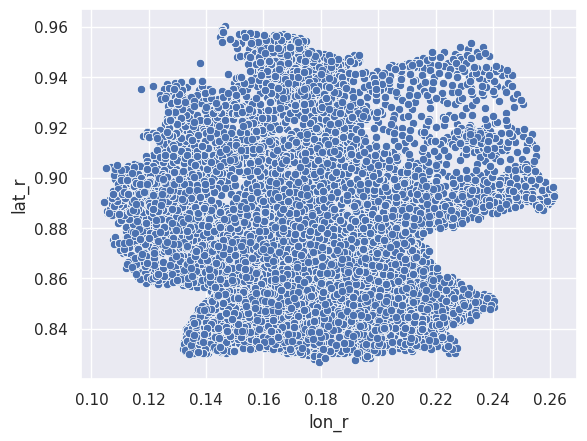

In [14]:
# lon_lat plot in radians
lon_lat_plot_r = sns.scatterplot(x='lon_r',
                                 y='lat_r',
                                 data=df)

In [15]:
# selecting employee for the individual clustering
emp = emps[0]
emp

'WFK1KQP'

In [16]:
df_emp = df[df.emp_id==emp]

### HDBSCAN
It is a heirarichal clustering algorithm which extends DBSCAN and extract a flat clustering based on the stablility of clusters.

It uses broadly following steps:
1. Transform the space according to the density/sparsity
2. Build the minimum spanning tree of the distance weighted graph
3. Construct a cluster heirarchy of connected components
4. Condense the cluster heirarchy based on minimum cluster size
5. Extract the stable clusters from the condensed tree

Note: The Haversine distance can be used with the HDBSCAN package

Full Study:
https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

In [17]:
!pip install joblib==1.0
!pip install hdbscan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.1
    Uninstalling joblib-1.3.1:
      Successfully uninstalled joblib-1.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.0.0 which is incompatible.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.0.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 41.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 27.6 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.30-cp310-cp310-linux_x86_64.whl size=3543408 sha256=4457ee

In [18]:
import hdbscan
from sklearn.cluster import DBSCAN
import folium
import re

In [19]:
# Preparing data array for hdbscan
X_r=np.array(df_emp[['lon_r', 'lat_r']], dtype='float64')
X_r[:5]

X = np.array(df_emp[['lon', 'lat']], dtype='float64')

array([[0.12167227, 0.89869366],
       [0.20081798, 0.84022447],
       [0.18998014, 0.86194455],
       [0.17808415, 0.84564566],
       [0.16528352, 0.89698418]])

In [20]:
# HDBSCAN Cluster
hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=6,
                          min_samples=2,
                          cluster_selection_epsilon=0.5/6371.0088,
                          gen_min_span_tree=True,
                          metric='haversine')

# DBSCAN Cluster
dbscan_cluster = DBSCAN(eps=15/6371.0088,
                        min_samples=2,
                        algorithm='ball_tree',
                        metric='haversine')

In [21]:
dbscan_fit = dbscan_cluster.fit(X_r)

In [22]:
class_pred_dbscan = dbscan_fit.labels_

In [23]:
df_emp.loc[:,'dbscan_cluster'] = class_pred_dbscan
df_emp.dbscan_cluster.value_counts()

<ipython-input-23-4d270e1e722a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp.loc[:,'dbscan_cluster'] = class_pred_dbscan


-1     151
 9       8
 0       7
 1       5
 8       4
 22      4
 28      3
 15      3
 35      3
 25      3
 38      3
 4       3
 2       3
 36      2
 37      2
 24      2
 33      2
 32      2
 31      2
 30      2
 29      2
 27      2
 39      2
 26      2
 34      2
 20      2
 23      2
 21      2
 19      2
 18      2
 17      2
 16      2
 14      2
 13      2
 12      2
 11      2
 10      2
 7       2
 6       2
 5       2
 3       2
 40      2
Name: dbscan_cluster, dtype: int64

In [24]:
#df_emp = df[df.emp_id==emp]

In [25]:
30

30

In [26]:
MultiCityCluster = []
for i in df_emp.dbscan_cluster:
  try:
    x = df_emp[df_emp.dbscan_cluster==i].city.value_counts()[1]
    if not i in MultiCityCluster:
      MultiCityCluster.append(i)
  except:
    pass

In [27]:
print(len(MultiCityCluster))
print(MultiCityCluster)

37
[0, 1, -1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


In [28]:
MultiCityClusterDf = pd.DataFrame(columns=['index', 'city', 'cluster'])

for cluster in MultiCityCluster:
  df_cluster = pd.DataFrame(df_emp[df_emp.dbscan_cluster==cluster].city.value_counts()).reset_index()
  df_cluster['cluster'] = cluster
  MultiCityClusterDf = MultiCityClusterDf.append(df_cluster, ignore_index=True)


<ipython-input-28-8e87c0cf02e4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MultiCityClusterDf = MultiCityClusterDf.append(df_cluster, ignore_index=True)
<ipython-input-28-8e87c0cf02e4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MultiCityClusterDf = MultiCityClusterDf.append(df_cluster, ignore_index=True)
<ipython-input-28-8e87c0cf02e4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MultiCityClusterDf = MultiCityClusterDf.append(df_cluster, ignore_index=True)
<ipython-input-28-8e87c0cf02e4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MultiCityClusterDf = MultiCityClusterDf.append(df_cluster, ignore_index=True)
<ipython

In [29]:
MultiCityClusterDf = MultiCityClusterDf.rename({'index':'city', 'city':'record_count'}, axis=1)

In [30]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(MultiCityClusterDf[~MultiCityClusterDf.cluster.isin([-1,0])])

print("\nSum of Clustered HCPs: ",MultiCityClusterDf[MultiCityClusterDf.cluster!=-1].record_count.sum())

                                  city record_count cluster
7                        80687 München            1       1
8           85521 Ottobrunn/Riemerling            1       1
9                        80935 München            1       1
10                       81929 München            1       1
11             82152 Planegg/Krailling            1       1
163                      96170 Lisberg            2       2
164                      97483 Eltmann            1       2
165         98663 Bad Colberg-Heldburg            2       4
166                 96176 Pfarrweisach            1       4
167              08261 Schöneck/Vogtl.            1       5
168              08209 Auerbach/Vogtl.            1       5
169                      86692 Münster            1       6
170                      86508 Rehling            1       6
171                   74864 Fahrenbach            1       7
172                   74842 Billigheim            1       7
173                     01619 Zeithain  

In [31]:
df_emp.city.value_counts()

01619 Zeithain             3
14728 Rhinow               3
96123 Litzendorf           2
44319 Dortmund             2
91486 Uehlfeld             2
                          ..
78224 Singen               1
92554 Thanstein            1
91465 Ergersheim           1
79733 Görwihl              1
82152 Planegg/Krailling    1
Name: city, Length: 246, dtype: int64

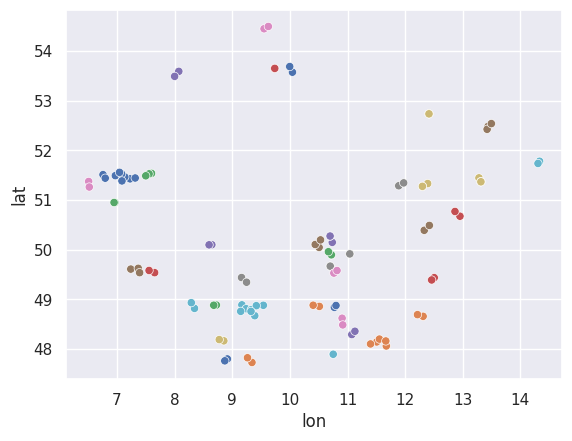

In [32]:
# Visualizing data
sns.set(color_codes=True)
lon_lat_plot = sns.scatterplot(x='lon',
                               y='lat',
                               hue='dbscan_cluster',
                               palette='deep',
                               legend=False,
                               data=df_emp[df_emp.dbscan_cluster!=-1])

In [33]:
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff',
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
        '#000075', '#808080']*50

cols = sns.color_palette("deep", 500).as_hex()

In [34]:
class_pred_hdbscan = hdbscan_cluster.fit_predict(X_r)
df_emp.loc[:,'hdbscan_cluster'] = class_pred_hdbscan

<ipython-input-34-6d9fc8b50ea7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp.loc[:,'hdbscan_cluster'] = class_pred_hdbscan


In [35]:
df_emp.head()
df_emp.hdbscan_cluster.max()

,customer_id,city,emp_id,Unnamed: 0,zipcode,einwohner,qkm,lon,lat,lon_r,lat_r,dbscan_cluster,hdbscan_cluster
129,3I20LJH,45356 Essen,WFK1KQP,2991,45356,14236,9.328435,6.971308,51.491354,0.121672,0.898694,0,8
159,5OE2TGQ,80687 München,WFK1KQP,7752,80687,21577,2.311476,11.506022,48.141316,0.200818,0.840224,1,4
461,ZQYFB8Q,90574 Roßtal,WFK1KQP,1752,90574,9784,44.322163,10.885060,49.385785,0.189980,0.861945,-1,6
737,AEYNSZE,89340 Leipheim,WFK1KQP,6127,89340,6555,32.132801,10.203470,48.451927,0.178084,0.845646,-1,-1
850,LNHNKNU,34314 Espenau,WFK1KQP,1982,34314,4904,13.533329,9.470048,51.393408,0.165284,0.896984,-1,2


9

In [36]:
MultiCityCluster = []
for i in df_emp.dbscan_cluster:
  try:
    x = df_emp[df_emp.hdbscan_cluster==i].city.value_counts()[1]
    if not i in MultiCityCluster:
      MultiCityCluster.append(i)
  except:
    pass

In [37]:
print(len(MultiCityCluster))
print(MultiCityCluster)

11
[0, 1, -1, 2, 3, 4, 5, 6, 7, 8, 9]


In [38]:
MultiCityClusterDf = pd.DataFrame(columns=['index', 'city', 'cluster'])

for cluster in MultiCityCluster:
  df_cluster = pd.DataFrame(df_emp[df_emp.hdbscan_cluster==cluster].city.value_counts()).reset_index()
  df_cluster['cluster'] = cluster
  MultiCityClusterDf = MultiCityClusterDf.append(df_cluster, ignore_index=True)

MultiCityClusterDf = MultiCityClusterDf.rename({'index':'city', 'city':'record_count'}, axis=1)

<ipython-input-38-0f85ee160f25>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MultiCityClusterDf = MultiCityClusterDf.append(df_cluster, ignore_index=True)
<ipython-input-38-0f85ee160f25>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MultiCityClusterDf = MultiCityClusterDf.append(df_cluster, ignore_index=True)
<ipython-input-38-0f85ee160f25>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MultiCityClusterDf = MultiCityClusterDf.append(df_cluster, ignore_index=True)
<ipython-input-38-0f85ee160f25>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MultiCityClusterDf = MultiCityClusterDf.append(df_cluster, ignore_index=True)
<ipython

In [39]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(MultiCityClusterDf[MultiCityClusterDf.cluster!=-1])

print("\nSum of Clustered HCPs: ",MultiCityClusterDf[MultiCityClusterDf.cluster!=-1].record_count.sum())

                                          city record_count cluster
0                             15746 Groß Köris            1       0
1                        12045 Berlin Neukölln            1       0
2                          12349 Berlin Buckow            1       0
3            13055 Berlin Alt-Hohenschönhausen            1       0
4                                14480 Potsdam            1       0
5                          16248 Oderberg u.a.            1       0
6                               01619 Zeithain            3       1
7              04931 Mühlberg, Bad Liebenwerda            1       1
8                  02979 Spreetal, Elsterheide            1       1
9                                03044 Cottbus            1       1
10                            02785 Olbersdorf            1       1
11                               02739 Kottmar            1       1
12                      01936 Königsbrück u.a.            1       1
13                       15230 Frankfurt/ Oder  

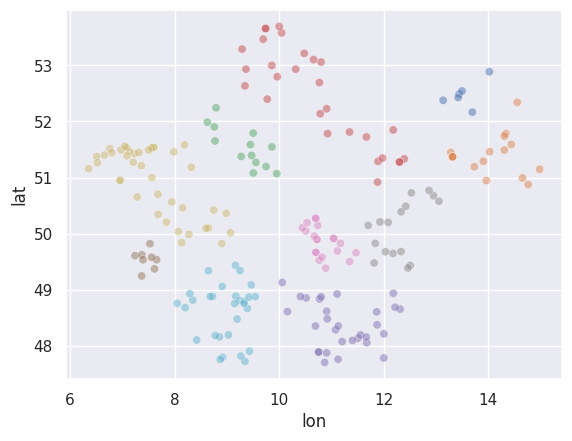

In [40]:
# Visualizing data
sns.set(color_codes=True)
lon_lat_plot = sns.scatterplot(x='lon',
                               y='lat',
                               hue='hdbscan_cluster',
                               palette='deep',
                               alpha=0.5,
                               legend=False,
                               data=df_emp[df_emp.hdbscan_cluster!=-1])

## Silhouette Scores

In [41]:
from sklearn.metrics import silhouette_score

print(f'DBSCAN Silhouette ignoring outliers: {silhouette_score(X_r[class_pred_dbscan!=-1], class_pred_dbscan[class_pred_dbscan!=-1])}')

print(f'HDBSCAN Silhouette ignoring outliers: {silhouette_score(X_r[class_pred_hdbscan!=-1], class_pred_hdbscan[class_pred_hdbscan!=-1])}')

DBSCAN Silhouette ignoring outliers: 0.7510334601530692
HDBSCAN Silhouette ignoring outliers: 0.3807850706218563
